In [ ]:
#Data is in files like MAB_based_collection_right_4_24.json
#/disk0/sumeetku/earthquake_data
# Suggested search terms are in 
# ucb_next_search_terms.txt, mean_10_next_search_terms.txt and mean_next_search_terms.txt

# Make a plot of Total tweets collection, tweets suggested by 'earthquake'
# and tweets suggested by different algorithms

In [6]:
# First make a general plot for all tweets
# and tweets continaing earthquake terms

import os
import operator
from collections import Counter
import sys
import json
import datetime as dt
from datetime import datetime
import time
# from urlparse import urlparse
from matplotlib.dates import date2num
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import numpy as np

from wordcloud import WordCloud
from textblob import TextBlob
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV

import pandas as pd

In [22]:
tweetsPath = "/disk0/sumeetku/earthquake_data/"
output_path = "/disk0/sumeetku/earthquake_data/results/"
NAME= 'Earthquake Tweets'

files = []
topic_ids_to_filter = ['_7'] #'13384', '13442', '13461', '13475', '13492','13546', '13626', '13641', '13979', '14110', '15051'
for file_name in os.listdir(tweetsPath):
    if file_name.endswith(".json") and len(file_name.split('_')) > 3 and file_name.split('_')[4]=='6':
        files.append(tweetsPath + "/" + file_name)

print(len(files))


29


In [23]:
acl_tweetsPath = "~/deep_learning/MAB_for_data_collection/data/ACL_ICWSM_2018_datasets/nepal/"

df_nepal_train = pd.read_csv(acl_tweetsPath+ "2015_Nepal_Earthquake_train.tsv", sep = '\t', encoding='latin1')
print(len(df_nepal_train['label']))

df_nepal_test = pd.read_csv(acl_tweetsPath+ "2015_Nepal_Earthquake_test.tsv", sep = '\t', encoding='latin1')
print(len(df_nepal_test))

df_nepal_dev = pd.read_csv(acl_tweetsPath+ "2015_Nepal_Earthquake_dev.tsv", sep = '\t', encoding='latin1')
print(len(df_nepal_dev))


print(len(set(df_nepal_train['label'])))

label_set = list(set(df_nepal_train['label']))
print(label_set)

relevant_tweets = []
non_relavant_tweets = []

def clean_tweet(text):
    text= text.lower().replace('nepal', ' ')    
    return text


def get_data(df):
    for text, label in zip(df['text'], df['label']):
        if label == 'relevant':
            relevant_tweets.append(clean_tweet(text))
        else:
            non_relavant_tweets.append(clean_tweet(text))

    print('relevant_tweets: ', len(relevant_tweets))        
    print('non_relavant_tweets: ', len(non_relavant_tweets))   
    
    return relevant_tweets, non_relavant_tweets

train_relevant_tweets, train_non_relavant_tweets = get_data(df_nepal_train)
test_relevant_tweets, test_non_relavant_tweets = get_data(df_nepal_test)

parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 
                  'tfidf__use_idf': (True, False),
                  'clf-svm__alpha': (1e-2, 1e-3),
                 }


text_pipeline_nb = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB())])

text_clf_svm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                                   alpha=1e-3, max_iter=5, random_state=42)),
                        ])


text_clf_svm.fit(train_relevant_tweets + train_non_relavant_tweets, \
                 [1]*len(train_relevant_tweets) + [0]*len(train_non_relavant_tweets) )
predicted = text_clf_svm.predict(test_relevant_tweets + test_non_relavant_tweets)

print(np.mean(predicted == [1]*len(test_relevant_tweets) + [0]*len(test_non_relavant_tweets)))


6899
3479
1160
2
['not_relevant', 'relevant']
relevant_tweets:  3293
non_relavant_tweets:  3606
relevant_tweets:  4929
non_relavant_tweets:  5449
0.7934091347080362


In [25]:
from datetime import timedelta
# time_now = datetime.now()
#             self.write.write('time:{}\n'.format(str(time_now)))
    
#time:2019-04-25 20:00:02.110359
# with open('./ucb_next_search_terms.txt', 'a') as f_write:
#             f_write.write(('{}\t{}\n').format(str(time_now), json.dumps(ucb_next_search_terms)))

# with open('./mean_next_search_terms.txt', 'a') as f_write:
#     f_write.write(('{}\t{}\n').format(str(time_now), json.dumps(mean_next_search_terms)))

# with open('./mean_10_next_search_terms.txt', 'a') as f_write:
#     f_write.write(('{}\t{}\n').format(str(time_now), json.dumps(mean_10_next_search_terms)))

# import datetime
#time:2019-04-25 20:00:02.110359
# 2019-04-22 12:42:22.724697      ["#ear\u2026", "#philippine", "#quake", "#luzonquake", "#philippines", "#earthquake"]
# 2019-04-22 12:43:17.319663      ["#ear\u2026", "#philippine", "#quake", "#luzonquake", "#philippines", "#earthquake"]
        
date_time_str = '2018-06-29 08:15:27.243860'  
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date = time.mktime(date_time_obj.timetuple())

print('date: ', date)
print('Date:', date_time_obj.date())  
print('Time:', date_time_obj.time())  
print('Date-time:', date_time_obj)  


# from datetime import datetime

# function for parsing strings using specific format


def get_dates_and_search_terms(file_path):
    dates = []
    all_suggested_terms = []
    date_all_suggested_terms = {}
    with open(file_path, 'r') as f_read:
        for line in f_read:
            date_time_str, suggested_terms = line.strip().split('\t')
            date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
            date = time.mktime(date_time_obj.timetuple())
            dates.append(date_time_obj)

            terms_array = json.loads(suggested_terms)
            
            
            terms_dict = {}
            for tag in terms_array:
                terms_dict[tag] = 1
            
            date_all_suggested_terms[date_time_obj] = terms_dict
            
            all_suggested_terms.append(terms_array)
    return dates, all_suggested_terms, date_all_suggested_terms

mean_10_all_dates, __, mean_10_suggested_terms = get_dates_and_search_terms('/disk0/sumeetku/earthquake_data/mean_10_next_search_terms.txt')
mean_1_all_dates, __, mean_1_suggested_terms = get_dates_and_search_terms('/disk0/sumeetku/earthquake_data/mean_next_search_terms.txt')
ucb_10_all_dates, __, ucb_10_suggested_terms = get_dates_and_search_terms('/disk0/sumeetku/earthquake_data/ucb_next_search_terms.txt')

# print(len(dates))        
# print(len(all_suggested_terms))

get_datetime = lambda s: datetime.strptime(s, '%Y-%m-%d %H:%M:%S.%f')

base = get_datetime('2019-04-25 20:00:02.110359')

def get_closest_date(base, dates, suggested_terms):
    b_d = base
    def func(d):
        delta =  d - b_d if d > b_d else  abs(b_d - d)
        return delta
    
    closest_date = min(dates, key = func)
    return closest_date, suggested_terms[closest_date]

print('closest to 2019-04-25 20:00:02.110359 is :', get_closest_date(base, mean_1_all_dates, mean_1_suggested_terms))
print('closest to 2019-04-25 20:00:02.110359 is :', get_closest_date(base, ucb_10_all_dates, ucb_10_suggested_terms))


date:  1530274527.0
Date: 2018-06-29
Time: 08:15:27.243860
Date-time: 2018-06-29 08:15:27.243860
closest to 2019-04-25 20:00:02.110359 is : (datetime.datetime(2019, 4, 25, 20, 0, 2, 109580), {'#udemyfree': 1, '#bulge': 1, '#buynudes': 1, '#onlineclasses': 1, '#miraclebaby': 1, '#diy': 1, '#django': 1, '#download': 1, '#ioniansea': 1, '#live': 1})
closest to 2019-04-25 20:00:02.110359 is : (datetime.datetime(2019, 4, 25, 20, 0, 2, 109580), {'#gynaecology': 1, '#squirter': 1, '#natural': 1, '#brune…': 1, '#twerk': 1, '#under…': 1, '#tightpussy': 1, '#django': 1, '#ioniansea': 1, '#earthquake:': 1})


In [24]:
print(predicted)

[1 0 0 ... 1 0 0]


In [26]:
retweets_count = 0
tweets_count = 0

tags = []
mentions = []
tweets =[]

dates= []
dates_with_earthquake_tags = []

positive_sentiment_dates = []
negative_sentiment_dates = []
neutral_sentiment_dates = []


mean_10_dates = []
mean_1_dates = []
ucb_10_dates = []
        
vocabulary_size_dates = []
vocabulary_sizes =[]


unique_users = {}
hashtags_count = {}
mentions_count = {}
URL_timestamps ={}
user_hasthtags_sentiment = {} # {'User1' : [tag1:1.0, tag2:0.5, ...]}

# networks
user_user_mentions= {}
user_orig_user_retweet_count = {}
hashtag_users = {}
user_user_cohastag_count= {}


count_total_tags = Counter()
count_total_tweeters = Counter()
count_total_mentions = Counter()
count_total_urls = Counter()
count_total_user_mentions = Counter()

def process_name(name):
    name = name.strip()
    name = name.replace('_', '')
    name = name.lower()
    
    return name


# print('closest to 2019-04-25 20:00:02.110359 is :', get_closest_date(base, mean_10_dates, mean_10_suggested_terms)[0])
# print('closest to 2019-04-25 20:00:02.110359 is :', get_closest_date(base, mean_1_dates, mean_1_suggested_terms)[0])
# print('closest to 2019-04-25 20:00:02.110359 is :', get_closest_date(base, ucb_10_dates, ucb_10_suggested_terms)[0])

time_signals = []
# Now get some general statistics
for fname in files: #: # ['/disk0/sumeetku/earthquake_data/MAB_based_collection_right_4_26.json']: #
    try:
        file_name = fname.split('/')[len(fname.split('/')) -1]
        print('checking if out exists for file ', file_name)

    #     if file_name not in outputFiles:
        print('processing file ', file_name)
        with open(fname, 'r') as f:

            i = 0
            last_reported_time = 0
            last_mean_10_suggested_terms = []
            last_mean_1_suggested_terms = []
            last_ucb_10_suggested_terms = []


            for line in f:
                i = i +1

                if line.split(':')[0] == 'time':
                    date_time_str = line.strip().replace('time:', '')
                    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

                    date = time.mktime(date_time_obj.timetuple())
                    time_signals.append(date)
                    last_reported_time = date_time_obj

                    last_mean_10_suggested_terms = get_closest_date(date_time_obj, mean_10_all_dates, mean_10_suggested_terms)[1]
    #                 print('last_mean_10_suggested_terms: ', last_mean_10_suggested_terms)

                    last_mean_1_suggested_terms = get_closest_date(date_time_obj, mean_1_all_dates, mean_1_suggested_terms)[1]
    #                 print('last_mean_1_suggested_terms: ', last_mean_1_suggested_terms)

                    last_ucb_10_suggested_terms = get_closest_date(date_time_obj, ucb_10_all_dates, ucb_10_suggested_terms)[1]
    #                 print('last_ucb_10_suggested_terms: ', last_ucb_10_suggested_terms)


                    continue

                if len(line) <= 1 or last_reported_time ==0:
                    continue

    #             if i > 100:
    #                 break
                try:
                    tweet = json.loads(line)

                    tweets_count = tweets_count +1


                    tweet_id = '0'
                    if 'id' in tweet:
                        tweet_id = str(tweet['id']) 
                    # print(tweet_id)

                    if tweet_id == '0':
                        continue

                    text = ''
                    if 'full_text' in tweet:
                        text = tweet['full_text']
                    else:
                        text = tweet['text']

                    if 'extended_tweet' in tweet:
                        extended_tweet = tweet['extended_tweet']

                        if 'full_text' in extended_tweet:
                            text = extended_tweet['full_text']


                    sentiment_score = 0
                    if len(text) < 1:    
                        continue
                    else:
                        tweets.append(tweet)
                        sentiment_score = text_clf_svm.predict([text])[0]


                    name = '' # screen_name
                    if 'screen_name_lower' in tweet:
                        name = tweet['screen_name_lower']
                    elif 'user' in tweet and 'screen_name' in tweet['user']:
                        name = (tweet['user']['screen_name']).lower()
                    elif 'user' in tweet and 'name' in tweet['user']:
                        name = (tweet['user']['name']).lower()
                    else:
                        name = tweet_id

                    name = process_name(name)

                    if name not in  unique_users:   
                        unique_users[name]  = 0

                    unique_users[name] = unique_users[name] +1


                    tags = []
                    if 'hashtags' in tweet['entities']:
                        for tag in tweet['entities']['hashtags']:
                            if 'text' in tag:
                                tags.append('#' + process_name(tag['text']))

                    mentions = []
                    if 'user_mentions' in tweet['entities']:
                        for mention in tweet['entities']['user_mentions']:
                            if 'screen_name' in mention:
                                mention_name = mention['screen_name']
                                mentions.append(process_name(mention_name))


                    is_retweet = False
                    if 'retweeted_status' in tweet:
                        original_tweet = tweet['retweeted_status']
                        if 'id' in original_tweet or 'text' in original_tweet:
                            retweets_count = retweets_count +1
                            is_retweet = True


                    count_total_tags.update(tags)
                    count_total_tweeters.update([name])
                    count_total_mentions.update(mentions)
                    count_total_user_mentions.update(len(mentions)* [name])


                    # Create user - user mention networs
                    for mention in mentions:
                        user_mention = name + '_' + mention
                        if user_mention not in user_user_mentions:
                            user_user_mentions[user_mention] = 0

                        user_user_mention_count = user_user_mentions[user_mention]
                        user_user_mentions[user_mention] = user_user_mention_count + 1



    #               user_orig_user_retweet_count = {}
                    for tag in tags:
    #                     tag = process_name(tag)
                        if tag not in hashtag_users:
                            hashtag_users[tag] = []

                        hashtag_users_collection = hashtag_users[tag]
                        hashtag_users_collection.append(name)
                        hashtag_users[tag] = hashtag_users_collection 

                        if name not in user_hasthtags_sentiment:
                            user_hasthtags_sentiment[name] = {}

                        hasthtags_sentiment_for_a_user = user_hasthtags_sentiment[name]
                        if tag not in hasthtags_sentiment_for_a_user:
                            hasthtags_sentiment_for_a_user[tag] = []

    #                     sentiments = hasthtags_sentiment_for_a_user[tag]
    #                     sentiments.append(sentiment_score)

    #                     hasthtags_sentiment_for_a_user[tag] = sentiments
    #                     user_hasthtags_sentiment[name] = hasthtags_sentiment_for_a_user





                    # Create user - user co-hastag network

                    # Create user- user - retweet network


                    date = 0
                    timestamp = 0
                    if 'created_at' in tweet:
                        d = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y');


                        date = time.mktime(d.timetuple())
                        dates.append(date)
                        if 'earthquake' in text.lower():
                            dates_with_earthquake_tags.append(date)

                        timestamp = int(date)

                        # set sentiment
                        if sentiment_score > 0.5:
                            positive_sentiment_dates.append(date)
#                         elif sentiment_score <= 0.05 and sentiment_score > -0.05:
#                             neutral_sentiment_dates.append(date)
                        else:
                            negative_sentiment_dates.append(date)

    #                     print('tags: ', tags)
                        for tag in tags:
                            if tag in last_mean_10_suggested_terms:
                                mean_10_dates.append(date)
                            if tag in last_mean_1_suggested_terms:
                                mean_1_dates.append(date)
                            if tag in last_ucb_10_suggested_terms:
                                ucb_10_dates.append(date)


                except Exception as e:
    #                         print(" could not load tweet" + line)
    #                         print(sys.exc_info()) 
                            print(str(e))
    #                         break
    except Exception as e:
        print(str(e))
        
print(tweets_count)         

# user_user_mentions_count= {}
# user_orig_user_retweet_count = {}
# hashtag_users = {}
# user_user_cohastag_count= {}

print('user_user_mentions:', len(user_user_mentions))
print('hashtag_users:', len(hashtag_users))
# print('user_hasthtags_sentiment:', len(user_hasthtags_sentiment))
                               

checking if out exists for file  MAB_based_collection_right_6_19.json
processing file  MAB_based_collection_right_6_19.json
checking if out exists for file  MAB_based_collection_right_6_25.json
processing file  MAB_based_collection_right_6_25.json
checking if out exists for file  MAB_based_collection_right_6_8.json
processing file  MAB_based_collection_right_6_8.json
checking if out exists for file  MAB_based_collection_right_6_16.json
processing file  MAB_based_collection_right_6_16.json
checking if out exists for file  MAB_based_collection_right_6_2.json
processing file  MAB_based_collection_right_6_2.json
checking if out exists for file  MAB_based_collection_right_6_5.json
processing file  MAB_based_collection_right_6_5.json
checking if out exists for file  MAB_based_collection_right_6_11.json
processing file  MAB_based_collection_right_6_11.json
checking if out exists for file  MAB_based_collection_right_6_13.json
processing file  MAB_based_collection_right_6_13.json
checking if ou

In [65]:
print(tweets_count)
print(len(time_signals))

print(len(mean_10_dates))
print(len(mean_1_dates))
print(len(ucb_10_dates))

print(len(positive_sentiment_dates))
print(len(negative_sentiment_dates))
print(len(neutral_sentiment_dates))

print(len(dates_with_earthquake_tags))
print(last_mean_10_suggested_terms)
print(tags)

print('Mean 10: ', 1.0*len(mean_10_dates) / len(dates_with_earthquake_tags))
print('UCB 10: ', 1.0*len(ucb_10_dates) / len(dates_with_earthquake_tags))
print('Mean 1: ',  1.0*len(mean_1_dates) / len(dates_with_earthquake_tags))
print('Relevant :',  1.0*len(positive_sentiment_dates) / len(dates_with_earthquake_tags))
print('Non-relevant: ', 1.0*len(negative_sentiment_dates) / len(dates_with_earthquake_tags))
print('Total: ', 1.0*len(positive_sentiment_dates + negative_sentiment_dates) / len(dates_with_earthquake_tags))


2293145
2762
263875
697341
214619
1582987
709567
0
406504
{'#naturalresources': 1, '#southyorkshire': 1, '#boat': 1, '#liveetransplantsurgery': 1, '#ขายเฮด': 1, '#poland': 1, '#potosi': 1, '#เด็กป๋าเชสซ์เจนสองจะพาไปต่อยหีวพี่เจนหนึ่ง': 1, '#relief': 1, '#seismic': 1}
['#usgs']
Mean 10:  0.6491326038612166
UCB 10:  0.527962824474052
Mean 1:  1.7154591344734615
Relevant : 3.894148643063783
Non-relevant:  1.7455350992856158
Total:  5.639683742349399


In [60]:

import matplotlib.dates as mdate
import numpy as np


# count_fake_dates = Counter()

# count_non_fake_dates = Counter()
print(min(dates))
print(max(dates))

print((dates[0:5]))

first = datetime.fromtimestamp(min(dates)).date()
last = datetime.fromtimestamp(max(dates)).date()

numdays = (last - first).days
print(first, last, numdays)


tweets_per_day = np.zeros(1+ numdays)
positive_per_day =  np.zeros(1+ numdays)
negative_per_day =  np.zeros(1+ numdays)
earthquake_per_day =  np.zeros(1+ numdays)
total_per_day =  np.zeros(1+ numdays)
# dates_with_earthquake_tags
normalized_positive_per_day =  np.zeros(1+ numdays)
normalized_negative_per_day =  np.zeros(1+ numdays)
normalized_earthquake_per_day =  np.zeros(1+ numdays)

mean_10_dates_per_day  = np.zeros(1+ numdays)
mean_1_dates_per_day = np.zeros(1+ numdays)
ucb_10_dates_per_day = np.zeros(1+ numdays)

tweets_per_day_dates = [first + dt.timedelta(days= x) for x in range(0, numdays +1)]

for date in dates:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    
    tweets_per_day[date_diff] = tweets_per_day[date_diff] + 1

vocabulary_per_day= {}
for j in range(0, 1+ numdays): 
    vocabulary_per_day[j] = {}

    
for i in range(0, len(vocabulary_size_dates)):    
    date = vocabulary_size_dates[i]
    
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    
#     print(date_diff)
    
#     if date_diff not in vocabulary_per_day:
#         vocabulary_per_day[date_diff] = {}
        
    vocabulary_per_day_on_a_given_date = vocabulary_per_day[date_diff]
    for word in vocabulary_sizes[i]:
        if word not in vocabulary_per_day_on_a_given_date:
            vocabulary_per_day_on_a_given_date[word] =0
        
        vocabulary_per_day_on_a_given_date[word] = vocabulary_per_day_on_a_given_date[word] + 1
        
    vocabulary_per_day[date_diff] = vocabulary_per_day_on_a_given_date
    
vocabulary_size_per_day = np.zeros(1+ numdays)

for date_diff, vocabulary in vocabulary_per_day.items():
    vocabulary_size_per_day[date_diff] = 1.0*len(vocabulary)/tweets_per_day[date_diff] 

    
for date in positive_sentiment_dates:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    positive_per_day[date_diff] = positive_per_day[date_diff] + 1    
    total_per_day[date_diff] = total_per_day[date_diff] + 1

for date in negative_sentiment_dates:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    negative_per_day[date_diff] = negative_per_day[date_diff] + 1 
    total_per_day[date_diff] = total_per_day[date_diff] + 1

for date in dates_with_earthquake_tags:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    earthquake_per_day[date_diff] = earthquake_per_day[date_diff] + 1 
    
#     print(len(mean_10_dates))
# print(len(mean_1_dates))
# print(len(ucb_10_dates))
    
for date in mean_10_dates:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    mean_10_dates_per_day[date_diff] = mean_10_dates_per_day[date_diff] + 1 

for date in mean_1_dates:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    mean_1_dates_per_day[date_diff] = mean_1_dates_per_day[date_diff] + 1 

for date in ucb_10_dates:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    ucb_10_dates_per_day[date_diff] = ucb_10_dates_per_day[date_diff] + 1 
    
for date in dates:
    tweet_date = datetime.fromtimestamp(date).date()
    date_diff = (tweet_date - first).days
    
    normalized_positive_per_day[date_diff] = (1.0*positive_per_day[date_diff])/(tweets_per_day[date_diff] +1)
    normalized_negative_per_day[date_diff] = (1.0*negative_per_day[date_diff])/(tweets_per_day[date_diff] +1)
    normalized_earthquake_per_day[date_diff] = (1.0*earthquake_per_day[date_diff])/(tweets_per_day[date_diff] +1)
    

1559361596.0
1561953596.0
[1560916796.0, 1560916796.0, 1560916797.0, 1560916798.0, 1560916799.0]
2019-05-31 2019-06-30 30


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars


In [29]:
print(len(tweets_per_day_dates))

31


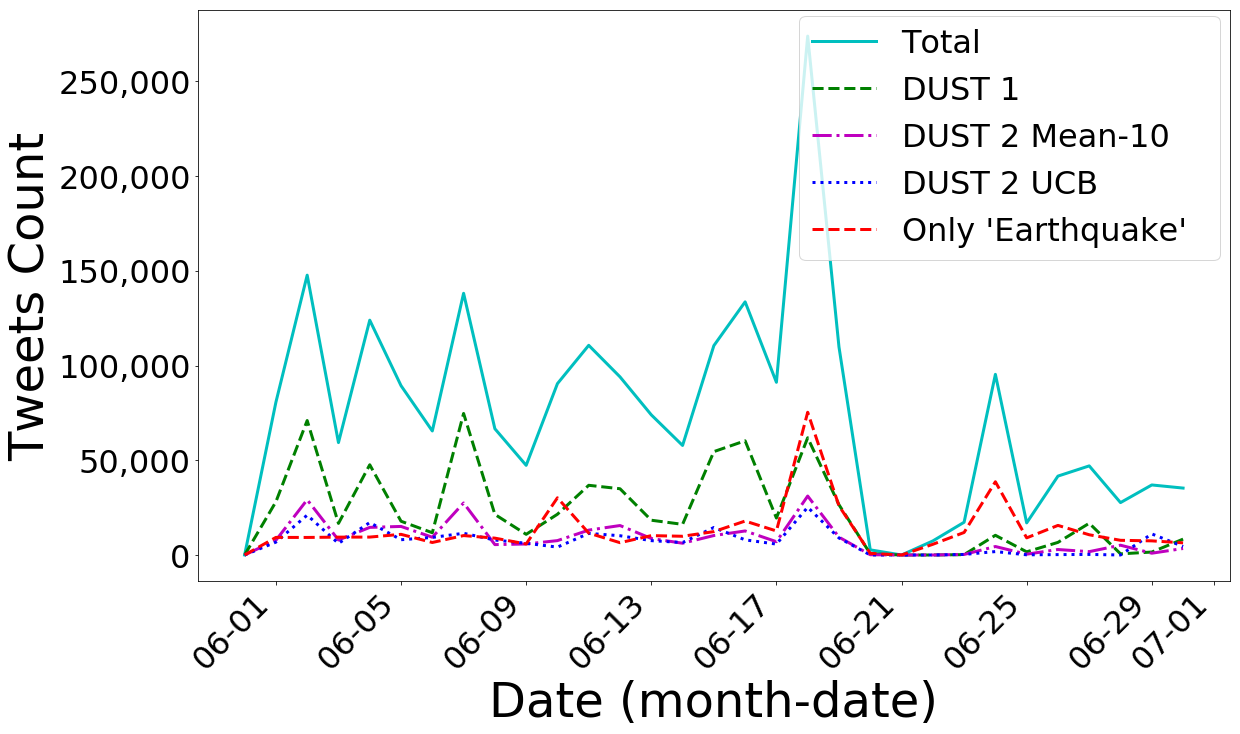

In [75]:
# Tweet Trend
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 32}

plt.rc('font', **font)



fig, (ax1) = plt.subplots(1)
fig.set_size_inches(18.5, 10.5, forward=True)

#| '-' | '--' | '-.' | ':' | 'None' | ' ' | '']
ax1.plot_date(tweets_per_day_dates, total_per_day,linewidth=3.0 , fmt='c', ls ='-',label='Total')
ax1.plot_date(tweets_per_day_dates, mean_1_dates_per_day,linewidth=3.0 , fmt='g', ls ='--' , label='DUST 1 ')
ax1.plot_date(tweets_per_day_dates, mean_10_dates_per_day,linewidth=3.0 , fmt='m', ls ='-.' , label='DUST 2 Mean-10 ')
ax1.plot_date(tweets_per_day_dates, ucb_10_dates_per_day,linewidth=3.0 , fmt='b', ls =':' , label='DUST 2 UCB  ')
ax1.plot_date(tweets_per_day_dates, earthquake_per_day,linewidth=3.0 , fmt='r', ls ='--' , label='Only \'Earthquake\'  ')

#     ax.fill_between(attackTimes[i], 0, attacksReceiveds[i])

# Choose your xtick format string
date_fmt = '%m-%d'

# Use a DateFormatter to set the data to the correct format.
date_formatter = mdate.DateFormatter(date_fmt)
ax1.xaxis.set_major_formatter(date_formatter)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# plt.title(NAME + ' Twitter Dataset', fontsize=48)
ax1.set_xlabel('Date (month-date)', fontsize=48)
ax1.set_ylabel('Tweets Count', fontsize=48)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0)    
plt.show()
# plt.savefig( './june_trend.pdf') 
# plt.savefig(output_path + NAME + '_trend.png') 

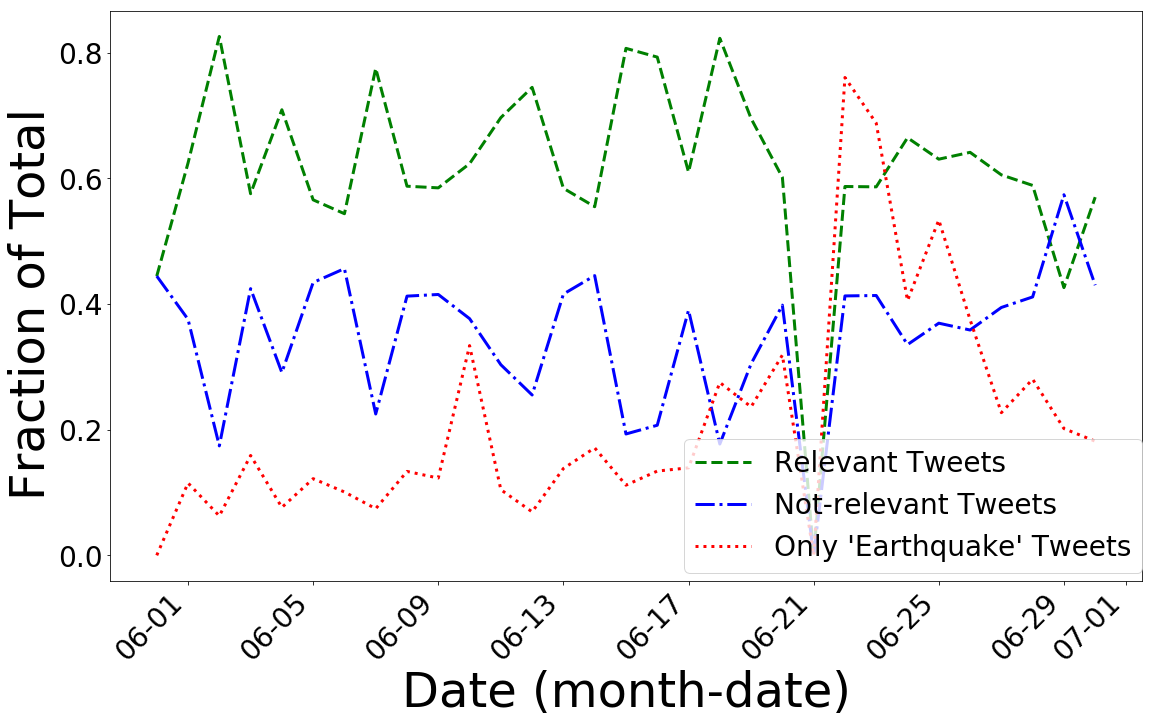

In [76]:
# Normalized sentiment trend



font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

plt.rc('font', **font)



fig, (ax1) = plt.subplots(1)
fig.set_size_inches(18.5, 10.5, forward=True)

# ax1.plot_date(tweets_per_day_dates, rest_per_day, fmt='b', label='Tweets sharing Rest URLs')
# ax1.plot_date(tweets_per_day_dates, tweets_per_day, fmt='r' , label='Tweets Trend')
ax1.plot_date(tweets_per_day_dates, normalized_positive_per_day, fmt='g',linewidth=3.0 , ls ='--' ,label='Relevant Tweets ')
ax1.plot_date(tweets_per_day_dates, normalized_negative_per_day, fmt='b' ,linewidth=3.0 , ls ='-.' ,label='Not-relevant Tweets ')
ax1.plot_date(tweets_per_day_dates, normalized_earthquake_per_day, fmt='r' ,linewidth=3.0 , ls =':' ,label='Only \'Earthquake\' Tweets')

#     ax.fill_between(attackTimes[i], 0, attacksReceiveds[i])

# Choose your xtick format string
date_fmt = '%m-%d'

# Use a DateFormatter to set the data to the correct format.
date_formatter = mdate.DateFormatter(date_fmt)
ax1.xaxis.set_major_formatter(date_formatter)
# plt.title(NAME + ' Twitter Dataset', fontsize=48)
ax1.set_xlabel('Date (month-date)', fontsize=48)
ax1.set_ylabel('Fraction of Total ', fontsize=48)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.0, 0.25), loc=1, borderaxespad=0)    
plt.show()

# plt.savefig(output_path + NAME + '_normalized_sentiment__trend.png') 
# plt.savefig(output_path + NAME + '_trend.png') 

In [ ]:
#2019-04-22 12:42:22.724697 ["#ear\u2026", "#philippine", "#quake", "#luzonquake", "#philippines", "#earthquake"]
# 2019-04-22 12:43:17.319663 ["#ear\u2026", "#philippine", "#quake", "#luzonquake", "#philippines", "#earthquake"]
# 2019-04-22 12:44:20.818665 ["#philippine", "#quake", "#ear\u2026", "#luzonquake", "#gameofthrones", "#earthday", "#mondaymorning", "#mondaythoughts", "#blockchain", "#identity"]
# 

In [23]:
# Hastags wrodcloud

sentence = ""

rects = []
labels = []
for key, val in count_total_tags.items(): 
    full_tag = ""
    for j in range(1, int(float(val))):
        full_tag =   full_tag + " " + key
        
    sentence = sentence + " " +  full_tag
    
                    
wordcloud = WordCloud(max_font_size=40, background_color='white').generate(sentence)
plt.figure()
fig = plt.gcf()
fig.set_size_inches(16, 10)
# plt.title(NAME + ' Hashtags Word Cloud', fontsize=48)
          
plt.imshow(install, interpolation="bilinear")
plt.axis("off")
# plt.show()

# file_name = str(terms[0][0]) + str("{0:.2f}".format(topic_sentiment))
plt.savefig(output_path + 'tags_wordcloud')

KeyboardInterrupt: 